<a href="https://colab.research.google.com/github/AkiBae4891/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/La_Teran_Evans_LS_DS5_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here
random.seed(10) # Sets Random Seed for Reproducibility

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=172.07500125969045, mobile=False), User(purchased=False, time_on_site=242.1604565076447, mobile=True), User(purchased=True, time_on_site=172.4562884302345, mobile=True), User(purchased=False, time_on_site=134.30741730988564, mobile=True), User(purchased=False, time_on_site=176.6659151415657, mobile=False), User(purchased=False, time_on_site=98.57704667574383, mobile=True), User(purchased=False, time_on_site=141.90635886960914, mobile=True), User(purchased=False, time_on_site=46.30954508769639, mobile=True), User(purchased=True, time_on_site=568.9570603645093, mobile=False), User(purchased=False, time_on_site=64.57737234489078, mobile=True)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,172.075001,False
1,False,242.160457,True
2,True,172.456288,True
3,False,134.307417,True
4,False,176.665915,False


In [0]:
user_data.dtypes

purchased          bool
time_on_site    float64
mobile             bool
dtype: object

In [0]:
user_data.isnull().sum()

purchased       0
time_on_site    0
mobile          0
dtype: int64

In [0]:
user_data.describe()

,time_on_site
count,1000.000000
mean,189.808593
std,127.484370
min,5.167894
25%,94.523032
50%,175.663445
75%,255.629865
max,599.904400


In [0]:
import numpy as np
user_data.describe(exclude=[np.number])

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,644,750


In [0]:
(1000 - 644)/1000 * 100

35.6

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.167894147962072,5.230051694531813,5.859655940198439,6.0175026563650755,6.029351938631506,6.076534025386882,7.530625255773601,7.817115390608255,7.825127435732432,7.9926238138229575,8.340271367612646,8.606832008318156,9.218381144065109,10.058796842584638,10.05973343102422,10.098880952488393,10.269710128673584,10.624743380825596,10.775511794102913,10.837439718435094,10.847332077574741,11.300954145638592,11.66995174259849,11.675545744100827,11.782873882183889,11.841426573214946,12.392535053460403,12.40665438918597,12.92898208568828,12.955059196515535,12.996416835255978,13.382120427301592,13.54511635197098,13.934746202094221,14.137459282045185,15.38873657245532,16.922971203004536,17.353027809843624,17.447706834056127,17.662245360895042,...,482.6472145022762,485.9266783851125,486.4774281431866,489.8595383008188,492.78513492217877,495.15954119502254,497.0189957498146,499.3596843687688,502.23256501573536,503.5096132803155,510.3106040801197,513.7199567827874,514.524187056424,516.4726132592837,517.4950119989117,518.7549370475441,523.0318717844676,524.0890952881243,541.9178996100884,547.2149524114925,553.3795732755347,563.7377598676529,565.1913401235421,568.9570603645093,569.1394152918596,570.4001379889107,571.1747962145259,576.1168783345762,576.2458375079051,581.5998993123494,582.0038712877167,585.1679472229359,588.9784218509578,589.6238169166027,594.952201290341,595.4861528820476,595.6859588006147,597.9686255982785,599.821842253337,599.9043999383127
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,...,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,0,1,0
True,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,1,0,1


In [0]:
# !pip freeze # 0.24.2
!pip install pandas==0.23.4

In [0]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.0.1
astor==0.8.0
astropy==3.0.5
atari-py==0.1.7
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.7
autograd==1.2
Babel==2.6.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
bokeh==1.0.4
boto==2.49.0
boto3==1.9.154
botocore==1.12.154
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.0
certifi==2019.3.9
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.7
cytoolz==0.9.0.1
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
dill==0.2.9
distributed==1.25.3
Django==2.2.1
dlib==19.16.0
dm-sonnet==1.32
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easydict==1.9
ecos=

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 6)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.573, 104.291]","(104.291, 203.413]","(203.413, 302.536]","(302.536, 401.659]","(401.659, 500.782]","(500.782, 599.904]"
purchased,,,,,,
False,207,180,169,41,30,17
True,77,109,133,10,12,15


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.573, 104.291]","(104.291, 203.413]","(203.413, 302.536]","(302.536, 401.659]","(401.659, 500.782]","(500.782, 599.904]"
purchased,,,,,,
False,0.728873,0.622837,0.559603,0.803922,0.714286,0.53125
True,0.271127,0.377163,0.440397,0.196078,0.285714,0.46875


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.728,0.616
True,0.272,0.384


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins],
                rownames=['device'],
                colnames=['purchased', 'time on site'],
                normalize='index')
ct

purchased               False        ...                      True 
time on site (4.573, 104.291]        ...         (500.782, 599.904]
device                               ...                           
False                   0.132        ...                       0.06
True                    0.232        ...                       0.00

[2 rows x 12 columns]

In [0]:
type(ct)

pandas.core.frame.DataFrame

In [0]:
pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(4.573, 104.291]",0.271127
"(104.291, 203.413]",0.377163
"(203.413, 302.536]",0.440397
"(302.536, 401.659]",0.196078
"(401.659, 500.782]",0.285714
"(500.782, 599.904]",0.468750


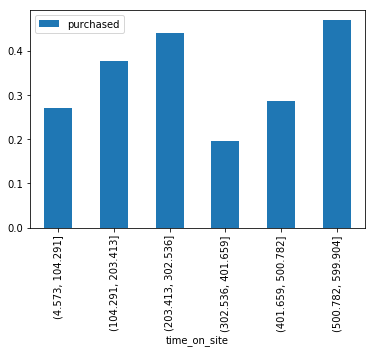

In [0]:
pt.plot.bar()

In [0]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
                 normalize='columns')
ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.573, 104.291]    0.181319  0.376623  0.073529  0.250000
(104.291, 203.413]  0.142857  0.333333  0.161765  0.340278
(203.413, 302.536]  0.192308  0.290043  0.220588  0.409722
(302.536, 401.659]  0.225275  0.000000  0.147059  0.000000
(401.659, 500.782]  0.164835  0.000000  0.176471  0.000000
(500.782, 599.904]  0.093407  0.000000  0.220588  0.000000

In [0]:
ct_final = ct.iloc[:, [2,3]]

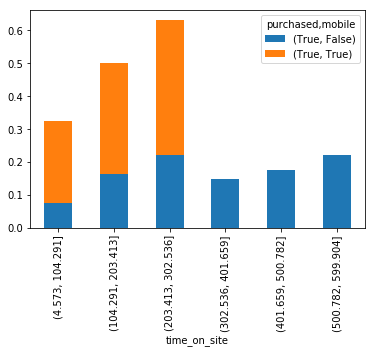

In [0]:
ct_final.plot(kind='bar', stacked=True)

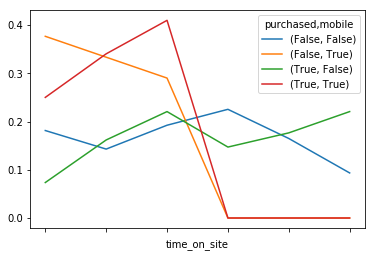

In [0]:
ct.plot();

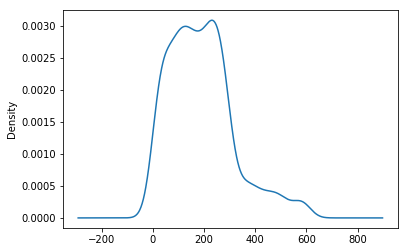

In [0]:
user_data['time_on_site'].plot.density();

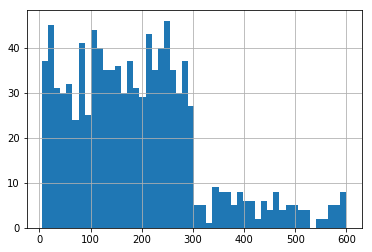

In [0]:
user_data['time_on_site'].hist(bins=50);

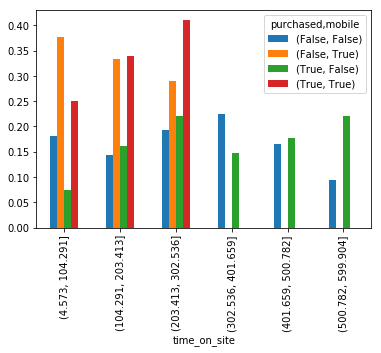

In [0]:
ct.plot(kind='bar')

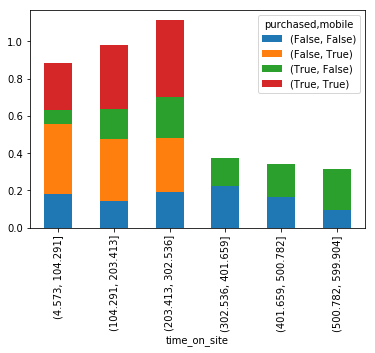

In [0]:
ct.plot(kind='bar', stacked=True);

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AkiBae4891/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [3]:
print(df.shape)
df.describe

(1200, 4)


<bound method NDFrame.describe of       Unnamed: 0  age  weight  exercise_time
0              0   44     118            192
1              1   41     161             35
2              2   46     128            220
3              3   39     216             57
4              4   28     116            182
5              5   58     103            165
6              6   55     161            107
7              7   21     188             37
8              8   55     216             79
9              9   50     127            267
10            10   21     160            228
11            11   43     102             78
12            12   73     209             44
13            13   27     165             48
14            14   21     169            171
15            15   36     131            194
16            16   49     171            191
17            17   69     172            147
18            18   18     122            271
19            19   55     157            111
20            20   19

In [6]:
df.dtypes

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

a) The variables look ordinal and discrete. Age and weight can be put in order and counted. Time is supposed to be continuous. 

2.  What are the relationships between the variables?

a) A possible relationship is age and weight. Younger ages can be lighter because they are 
smaller in body mass. If you figure humans "grow up" then we are larger when we are
older. 

3.  Which relationships are "real", and which spurious?

a) I think Age and Weight have a real relationship. As mentioned above about body size. 
I believe Age and Exersise time have a spurious correlation. They may look related,
but the time spent exersizing doesn't mean they are doing more than someone who 
exersizes for less time. Weight and Exersise time could be related because those who
spend more time will show more results. This is not always true though. 


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [22]:
# Using crosstabulation 
pd.crosstab(df['age'], df['exercise_time'])

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# time is huge, so I think it should be binned.

time_bins = pd.cut(df['exercise_time'], 6)
pd.crosstab(df['age'], ['time_bins'])

col_0,time_bins
age,
18,20
19,23
20,17
21,18
22,19
23,21
24,17
25,19
26,15


In [28]:
# Normalizing 

pd.crosstab(df['age'], ['time_bins'], normalize='columns')

col_0,time_bins
age,
18,0.016667
19,0.019167
20,0.014167
21,0.015000
22,0.015833
23,0.017500
24,0.014167
25,0.015833
26,0.012500


In [34]:
# The whole story here

ct = pd.crosstab(df['age'], [df['weight'], time_bins],
                rownames=['age'],
                colnames=['weight', 'exercise_time'],
                normalize='index')
ct

weight                 100                ...          244          246
exercise_time (-0.3, 50.0] (50.0, 100.0]  ... (-0.3, 50.0] (-0.3, 50.0]
age                                       ...                          
18                0.000000      0.000000  ...     0.000000          0.0
19                0.000000      0.000000  ...     0.000000          0.0
20                0.000000      0.000000  ...     0.000000          0.0
21                0.000000      0.000000  ...     0.000000          0.0
22                0.000000      0.000000  ...     0.000000          0.0
23                0.000000      0.000000  ...     0.000000          0.0
24                0.000000      0.000000  ...     0.000000          0.0
25                0.000000      0.000000  ...     0.000000          0.0
26                0.000000      0.000000  ...     0.000000          0.0
27                0.000000      0.000000  ...     0.000000          0.0
28                0.000000      0.000000  ...     0.000000          0.0
29                0.000000      0.000000  ...     0.000000          0.0
30                0.000000      0.000000  ...     0.000000          0.0
31                0.000000      0.000000  ...     0.000000          0.0
32                0.000000      0.000000  ...     0.000000          0.0
33                0.000000      0.000000  ...     0.000000          0.0
34                0.000000      0.000000  ...     0.000000          0.0
35                0.000000      0.000000  ...     0.000000          0.0
36                0.000000      0.000000  ...     0.000000          0.0
37                0.000000      0.000000  ...     0.000000          0.0
38                0.000000      0.000000  ...     0.000000          0.0
39                0.000000      0.000000  ...     0.000000          0.0
40                0.000000      0.000000  ...     0.000000          0.0
41                0.000000      0.000000  ...     0.000000          0.0
42                0.000000      0.000000  ...     0.000000          0.0
43                0.000000      0.000000  ...     0.000000          0.0
44                0.000000      0.000000  ...     0.000000          0.0
45                0.000000      0.000000  ...     0.000000          0.0
46                0.000000      0.000000  ...     0.000000          0.0
47                0.000000      0.000000  ...     0.000000          0.0
..                     ...           ...  ...          ...          ...
51                0.000000      0.000000  ...     0.000000          0.0
52                0.000000      0.000000  ...     0.000000          0.0
53                0.000000      0.000000  ...     0.000000          0.0
54                0.000000      0.000000  ...     0.000000          0.0
55                0.000000      0.000000  ...     0.000000          0.0
56                0.000000      0.000000  ...     0.000000          0.0
57                0.000000      0.000000  ...     0.000000          0.0
58                0.000000      0.000000  ...     0.000000          0.0
59                0.045455      0.000000  ...     0.000000          0.0
60                0.000000      0.000000  ...     0.000000          0.0
61                0.000000      0.000000  ...     0.000000          0.0
62                0.000000      0.000000  ...     0.000000          0.0
63                0.000000      0.000000  ...     0.000000          0.0
64                0.000000      0.000000  ...     0.000000          0.0
65                0.066667      0.000000  ...     0.000000          0.0
66                0.000000      0.000000  ...     0.000000          0.0
67                0.000000      0.000000  ...     0.000000          0.0
68                0.000000      0.000000  ...     0.000000          0.0
69                0.000000      0.000000  ...     0.000000          0.0
70                0.000000      0.000000  ...     0.052632          0.0
71                0.000000      0.000000  ...     0.000000          0.0
72                0.000000      0.000000

In [35]:
type(ct)

pandas.core.frame.DataFrame

In [41]:
# PT

pt = pd.pivot_table(df, values=['age'], index=['exercise_time'])
pt

,age
exercise_time,
0,26.000000
1,52.250000
2,62.142857
3,45.666667
4,58.000000
5,57.428571
6,52.166667
7,30.000000
8,74.000000


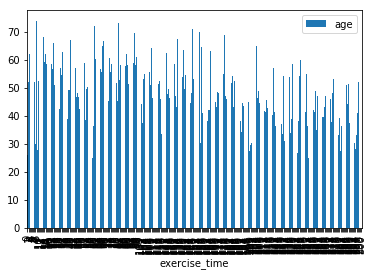

In [44]:
# Bar graph, can't even read the bottom label...

pt.plot.bar();

In [46]:
# CT

ct = pd.crosstab(time_bins, [df['age'], df['weight']],
                 normalize='columns')
ct

age              18                           ...   80                         
weight          102  114  115  116  120  122  ...  216  221  225  229  238  239
exercise_time                                 ...                              
(-0.3, 50.0]    0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  1.0  1.0  1.0
(50.0, 100.0]   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0  0.0  0.0
(100.0, 150.0]  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
(150.0, 200.0]  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
(200.0, 250.0]  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
(250.0, 300.0]  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0

[6 rows x 1105 columns]

In [0]:
ct_final = ct.iloc[:, [2,3]] # For here I'm not sure what position I should call 

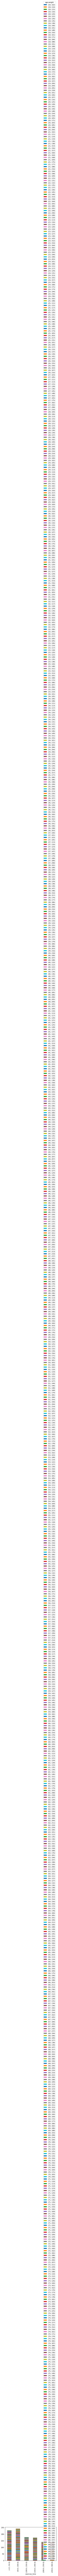

In [50]:
# stacked bar graph

ct.plot(kind='bar', stacked=True)

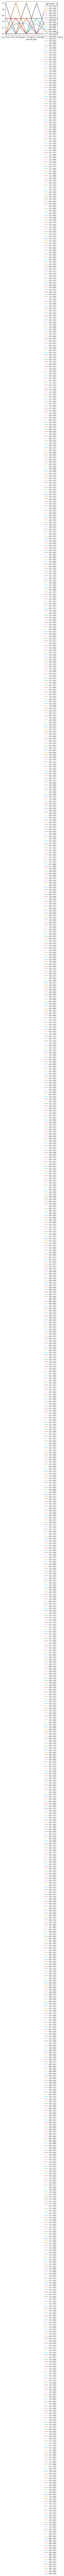

In [51]:
# normal plot, although it looks cool. I'm thinking this isnt right 
ct.plot();

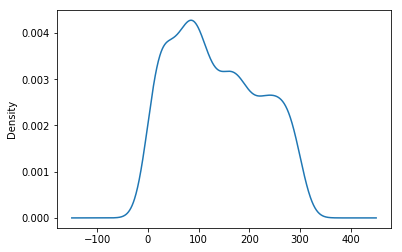

In [13]:
# Density

df['exercise_time'].plot.density();

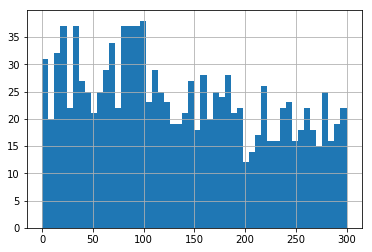

In [14]:
# Histogram

df['exercise_time'].hist(bins=50);

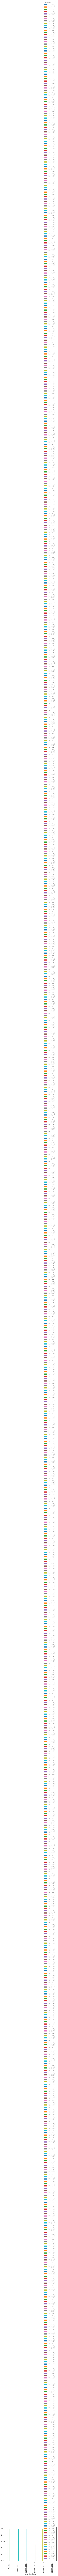

In [52]:
# Plot 

ct.plot(kind='bar')

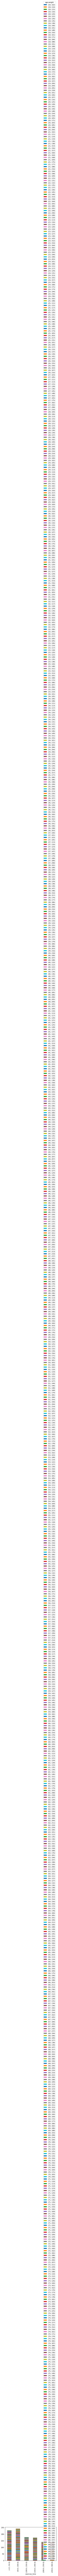

In [53]:
ct.plot(kind='bar', stacked=True); # if there is time I'd appreciate it if someone can explain whats happening here 

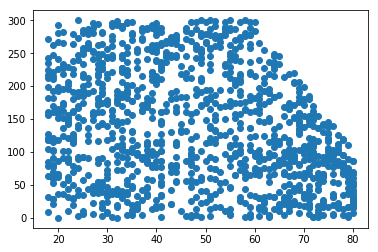

In [21]:
plt.scatter(df.age, df.exercise_time);